Extracting tf features for LDA...
done in 0.480s.
Fitting LDA model with tf features...
done in 4.555s.


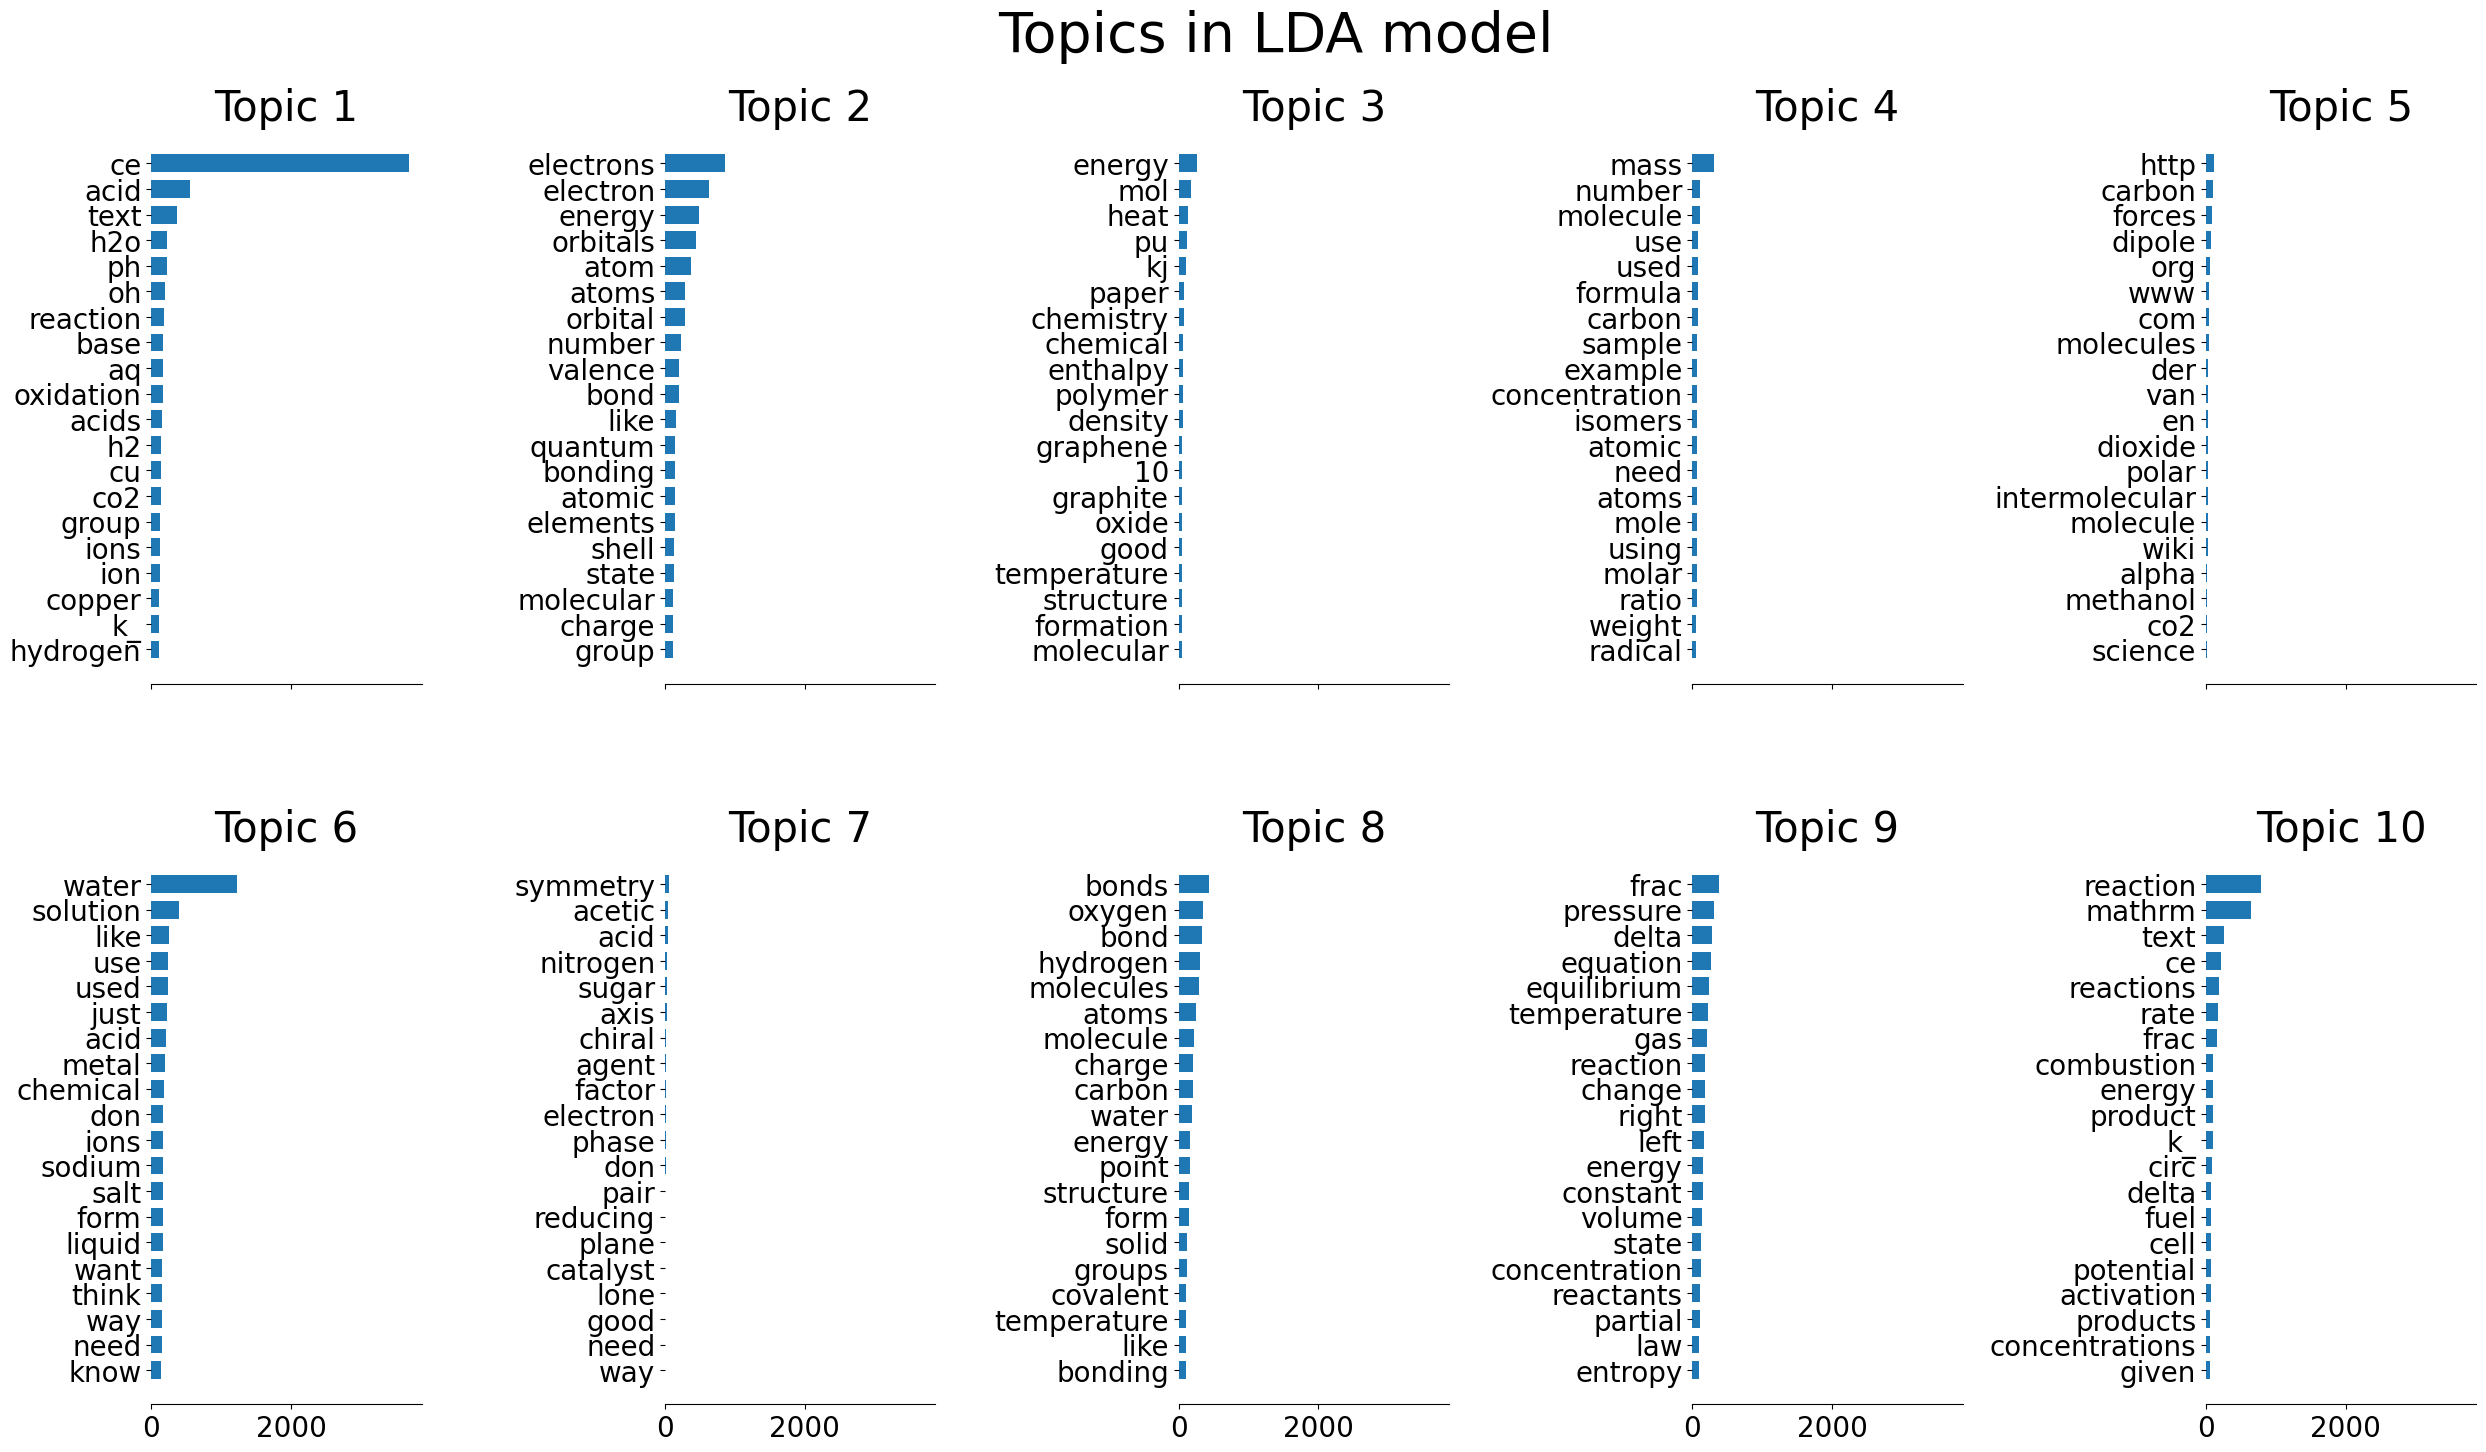

In [5]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Number of samples, features, components, and top words
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

# Load your dataset
# Assuming df_docs is a DataFrame with a column 'text' containing the documents
df_docs = pd.read_csv('/content/drive/MyDrive/lotte_docs.csv')  # Update this line with the actual path to your dataset

# Extract the text data
data_samples = df_docs['content'].tolist()[:n_samples]

# Vectorize the text data using CountVectorizer for LDA
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')
t0 = time.time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time.time() - t0))

# Fit the LDA model
print("Fitting LDA model with tf features...")
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5, learning_method='online', learning_offset=50., random_state=0)
t0 = time.time()
lda.fit(tf)
print("done in %0.3fs." % (time.time() - t0))

# Get the feature names
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Plot the top words for each topic
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
